# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Building a machine learning model using the ChEMBL bioactivity data.
Based on coursework from data science professor: Chanin Nantasenamat



**Part 2**: Performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-12-29 21:08:36--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: 'Miniconda3-py37_4.8.2-Linux-x86_64.sh'

Miniconda3-py37_4.8 100%[===================>]  81.12M  3.61MB/s    in 18s     

2024-12-29 21:08:53 (4.61 MB/s) - 'Miniconda3-py37_4.8.2-Linux-x86_64.sh' saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b

## **Load bioactivity data**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%cd "/home/drug_discovery/Drug-Discovery-with-Python-and-Machine-Learning/data"
df = pd.read_csv('bioactivity_data_preprocessed.csv') 

/home/drug_discovery/Drug-Discovery-with-Python-and-Machine-Learning/data


## **Calculate Lipinski descriptors**
A set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all **orally** active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
# If rdkit not installed, install it: %pip install rdkit

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [8]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation. Defining the custom function lipinski which takes the smiles notation as input and returns the molecular descriptors as output. The smiles notation contains the chemical details of the molecule. The function calculates the the molecular descriptors which are: molecular weight, octonal water partition coeff (LogP), number of hydrogen bond donors, and number of hydrogen bond acceptors as defined above by Lipinski's rule. The function returns the calculated molecular descriptors as a pandas dataframe.

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [10]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [11]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,530.456,5.19038,1.0,8.0
1,443.359,5.76780,1.0,6.0
2,373.869,4.50766,2.0,6.0
3,506.032,2.48884,3.0,9.0
4,506.032,2.48884,3.0,9.0
...,...,...,...,...
323,530.456,5.19038,1.0,8.0
324,532.428,4.73188,1.0,9.0
325,530.456,5.19038,1.0,8.0
326,532.428,4.73188,1.0,9.0


In [12]:
df

,molecul e_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,20.0
1,CHEMBL386051,CSc1cccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3...,active,2.0
2,CHEMBL364623,Cc1cc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)nc(C)n1,active,3.0
3,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,1.0
4,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,1.0
...,...,...,...,...
323,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,44.0
324,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,47.0
325,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,1.0
326,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,1.0


Combine the 2 Data Frames. There should be 8 columns.

In [13]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [14]:
df_combined

,molecul e_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,20.0,530.456,5.19038,1.0,8.0
1,CHEMBL386051,CSc1cccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3...,active,2.0,443.359,5.76780,1.0,6.0
2,CHEMBL364623,Cc1cc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)nc(C)n1,active,3.0,373.869,4.50766,2.0,6.0
3,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,1.0,506.032,2.48884,3.0,9.0
4,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,1.0,506.032,2.48884,3.0,9.0
...,...,...,...,...,...,...,...,...
323,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,44.0,530.456,5.19038,1.0,8.0
324,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,47.0,532.428,4.73188,1.0,9.0
325,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,1.0,530.456,5.19038,1.0,8.0
326,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,1.0,532.428,4.73188,1.0,9.0


Get some basic details about the standard_value IC50 column like mean and st.dev

In [29]:
df_combined.standard_value.describe()

count      328.000000
mean      1398.500884
std       2988.669534
min          0.330000
25%          6.745000
50%         70.050000
75%        632.555000
max      10000.000000
Name: standard_value, dtype: float64

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [40]:
#Function already defined https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

First a quick scatter plot to see the IC50 values before conversion. IF any values are over 100 million. We should cap them at 100 million.

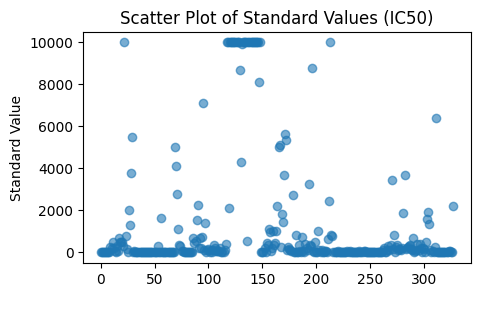

In [31]:
plt.figure(figsize=(5, 3))
plt.scatter(df_combined.index, df_combined['standard_value'], alpha=0.6)
plt.title('Scatter Plot of Standard Values (IC50)')
plt.xlabel(' ')
plt.ylabel('Standard Value')
plt.show()

From the plot we see we don't have any values more than 100 million but if we did we could go through this normalization step.
*Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.*

In [32]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [33]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

Defining the function that will cap the IC50 values if greater than 1 million.

In [36]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [37]:
df_norm = norm_value(df_combined)
df_norm

,molecul e_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,530.456,5.19038,1.0,8.0,20.0
1,CHEMBL386051,CSc1cccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3...,active,443.359,5.76780,1.0,6.0,2.0
2,CHEMBL364623,Cc1cc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)nc(C)n1,active,373.869,4.50766,2.0,6.0,3.0
3,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,506.032,2.48884,3.0,9.0,1.0
4,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,506.032,2.48884,3.0,9.0,1.0
...,...,...,...,...,...,...,...,...
323,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,530.456,5.19038,1.0,8.0,44.0
324,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,532.428,4.73188,1.0,9.0,47.0
325,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,530.456,5.19038,1.0,8.0,1.0
326,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,532.428,4.73188,1.0,9.0,1.0


In [38]:
df_norm.standard_value_norm.describe()

count      328.000000
mean      1398.500884
std       2988.669534
min          0.330000
25%          6.745000
50%         70.050000
75%        632.555000
max      10000.000000
Name: standard_value_norm, dtype: float64

Use the pIC50 function on your dataframe of normalized values (if they had to be normalized)

In [41]:
df_final = pIC50(df_norm)
df_final

,molecul e_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,530.456,5.19038,1.0,8.0,7.698970
1,CHEMBL386051,CSc1cccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3...,active,443.359,5.76780,1.0,6.0,8.698970
2,CHEMBL364623,Cc1cc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)nc(C)n1,active,373.869,4.50766,2.0,6.0,8.522879
3,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,506.032,2.48884,3.0,9.0,9.000000
4,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,506.032,2.48884,3.0,9.0,9.000000
...,...,...,...,...,...,...,...,...
323,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,530.456,5.19038,1.0,8.0,7.356547
324,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,532.428,4.73188,1.0,9.0,7.327902
325,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,530.456,5.19038,1.0,8.0,9.000000
326,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,532.428,4.73188,1.0,9.0,9.000000


In [42]:
df_final.pIC50.describe()

count    328.000000
mean       7.164134
std        1.313900
min        5.000000
25%        6.199114
50%        7.155319
75%        8.171286
max        9.481486
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set. A few reasons we might want to do this for machine learning models:

- Reducing the problem to a binary classification (active vs. inactive). This can make it easier to apply and interpret machine learning models.
- By focusing on clearly active or inactive compounds, you can establish more distinct decision boundaries. Machine learning models may perform better when trained on more distinct classes.
- Regulatory agencies often require clear evidence of a compound's activity and safety. Intermediate compounds may not provide sufficient clarity for regulatory approval

In [43]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecul e_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,530.456,5.19038,1.0,8.0,7.698970
1,CHEMBL386051,CSc1cccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3...,active,443.359,5.76780,1.0,6.0,8.698970
2,CHEMBL364623,Cc1cc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)nc(C)n1,active,373.869,4.50766,2.0,6.0,8.522879
3,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,506.032,2.48884,3.0,9.0,9.000000
4,CHEMBL5416410,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,active,506.032,2.48884,3.0,9.0,9.000000
...,...,...,...,...,...,...,...,...
323,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,530.456,5.19038,1.0,8.0,7.356547
324,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,532.428,4.73188,1.0,9.0,7.327902
325,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,active,530.456,5.19038,1.0,8.0,9.000000
326,CHEMBL5435819,COc1cc(Nc2c(C#N)cnc3cc(OCCON4CCN(C)CC4)c(OC)cc...,active,532.428,4.73188,1.0,9.0,9.000000


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [46]:
#Install seaborn if not installed with: %pip install seaborn
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt #if not already imported

### **Frequency plot of the 2 bioactivity classes**

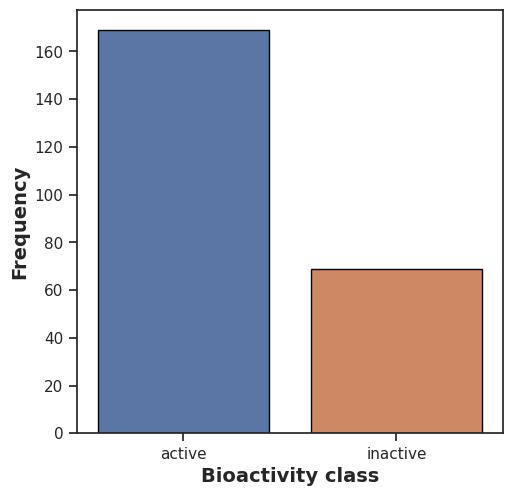

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, hue='bioactivity_class', edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

We see that 2 bioactivity classes are spanning similar chemical spaces. But there is also a cluster of active compounds that are clustering together as evident by the scatter plot of MW vs LogP.

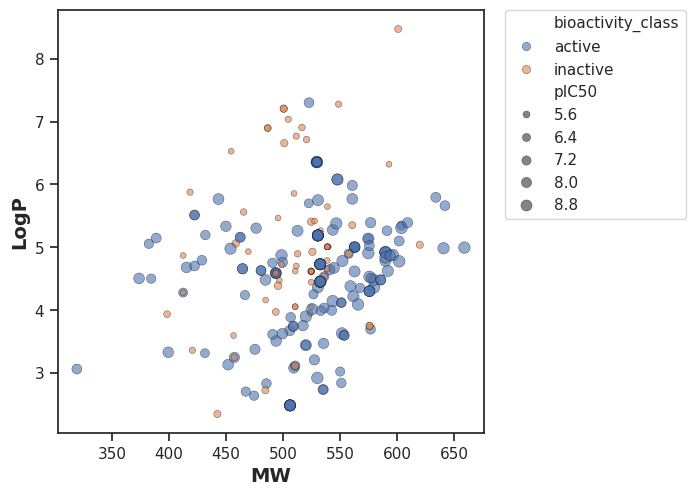

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.6)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

Here we see that the active class has higher pIC50 values because we defined a threshold for this

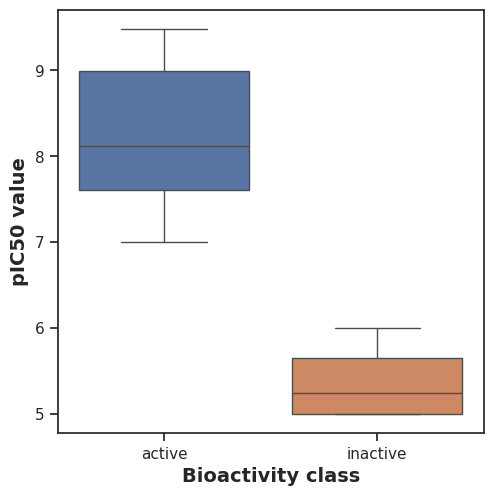

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', hue='bioactivity_class', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Comparing the active and inactive classes: Statistical analysis | Mann-Whitney U Test**

Define the mannwhitney function:

In [53]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [56]:
#Use scipy, if not installed, install using: %pip install scipy

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,11661.0,9.510534e-34,0.05,Different distribution (reject H0)


#### **Plot the rest of the descriptors and do Mann Whitney test**

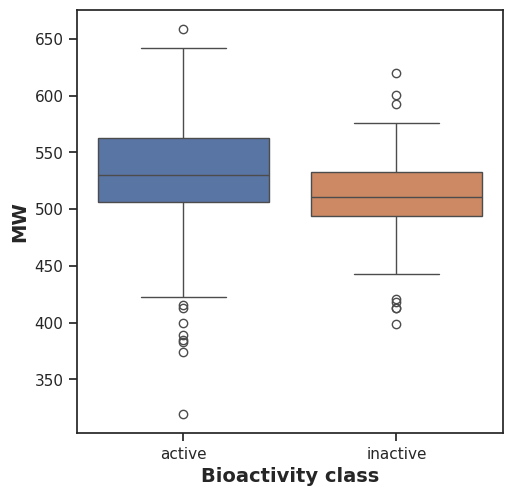

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', hue='bioactivity_class', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [60]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,7469.5,0.000672,0.05,Different distribution (reject H0)


#### **LogP**

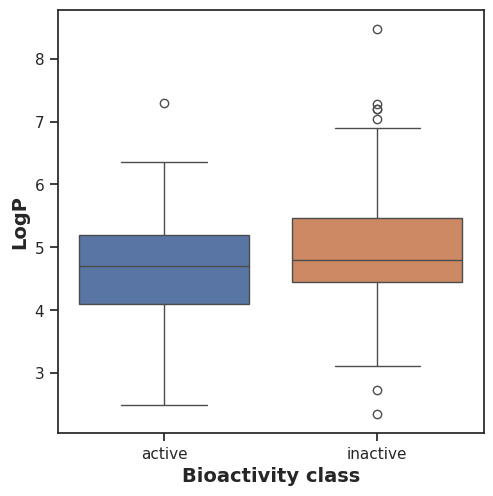

In [61]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', hue='bioactivity_class', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [63]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4941.5,0.065186,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

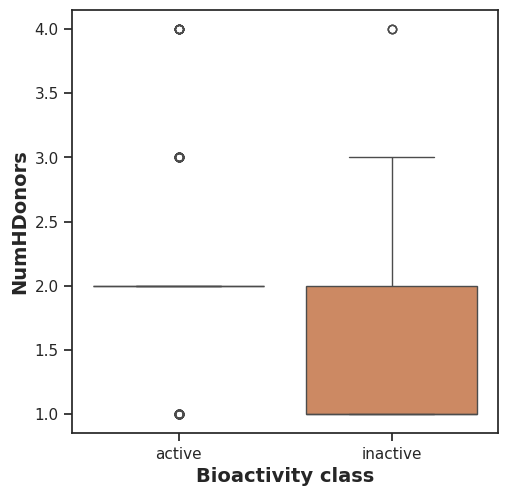

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', hue='bioactivity_class', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [65]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,7884.0,0.000005,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

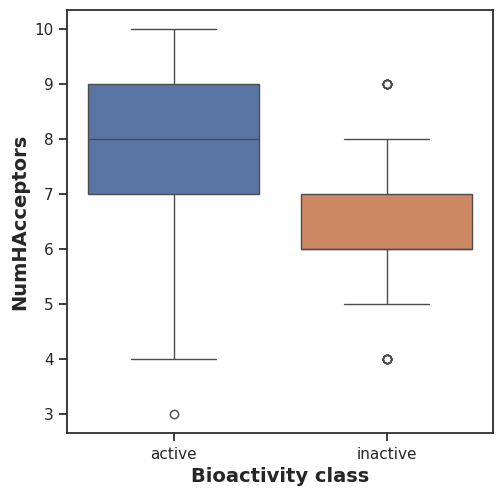

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', hue='bioactivity_class', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [67]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,8769.5,4.464191e-10,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**
**Remember For our BCR::ABL1 compounds with IC50 nM >=1000 will be inactive, <=100 will be active and 100-1000 will be intermediate, but we got rid of those.**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 100 nM = Actives while IC50 > 1000 nM = Inactives``, corresponding to ``pIC50 > 7 = Actives and pIC50 < 6 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, Octanol-water partition coefficient (LogP), NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [78]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: bioactivity_data.csv (deflated 92%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: bioactivity_data_preprocessed.csv (deflated 86%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_ic50.pdf (deflated 37%)
